In [ ]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
from obspy import UTCDateTime, read, Stream
import pandas as pd
import glob
import datetime
from obspy.signal.filter import envelope

## Get data from CDO (while it still exists...)

GIS interface: https://www.ncei.noaa.gov/maps/hourly/?layers=0001

Activate those layers:

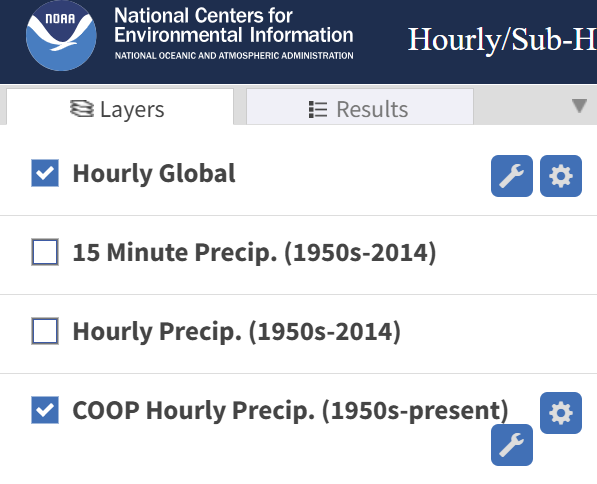


Then zoom to the area of interest, when you see a scatter point (usually yellowish), use the

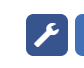 

button next to one of the layers to activate the Tools menu, from which you can use the "i" Indentify tool to click on the scatter point:


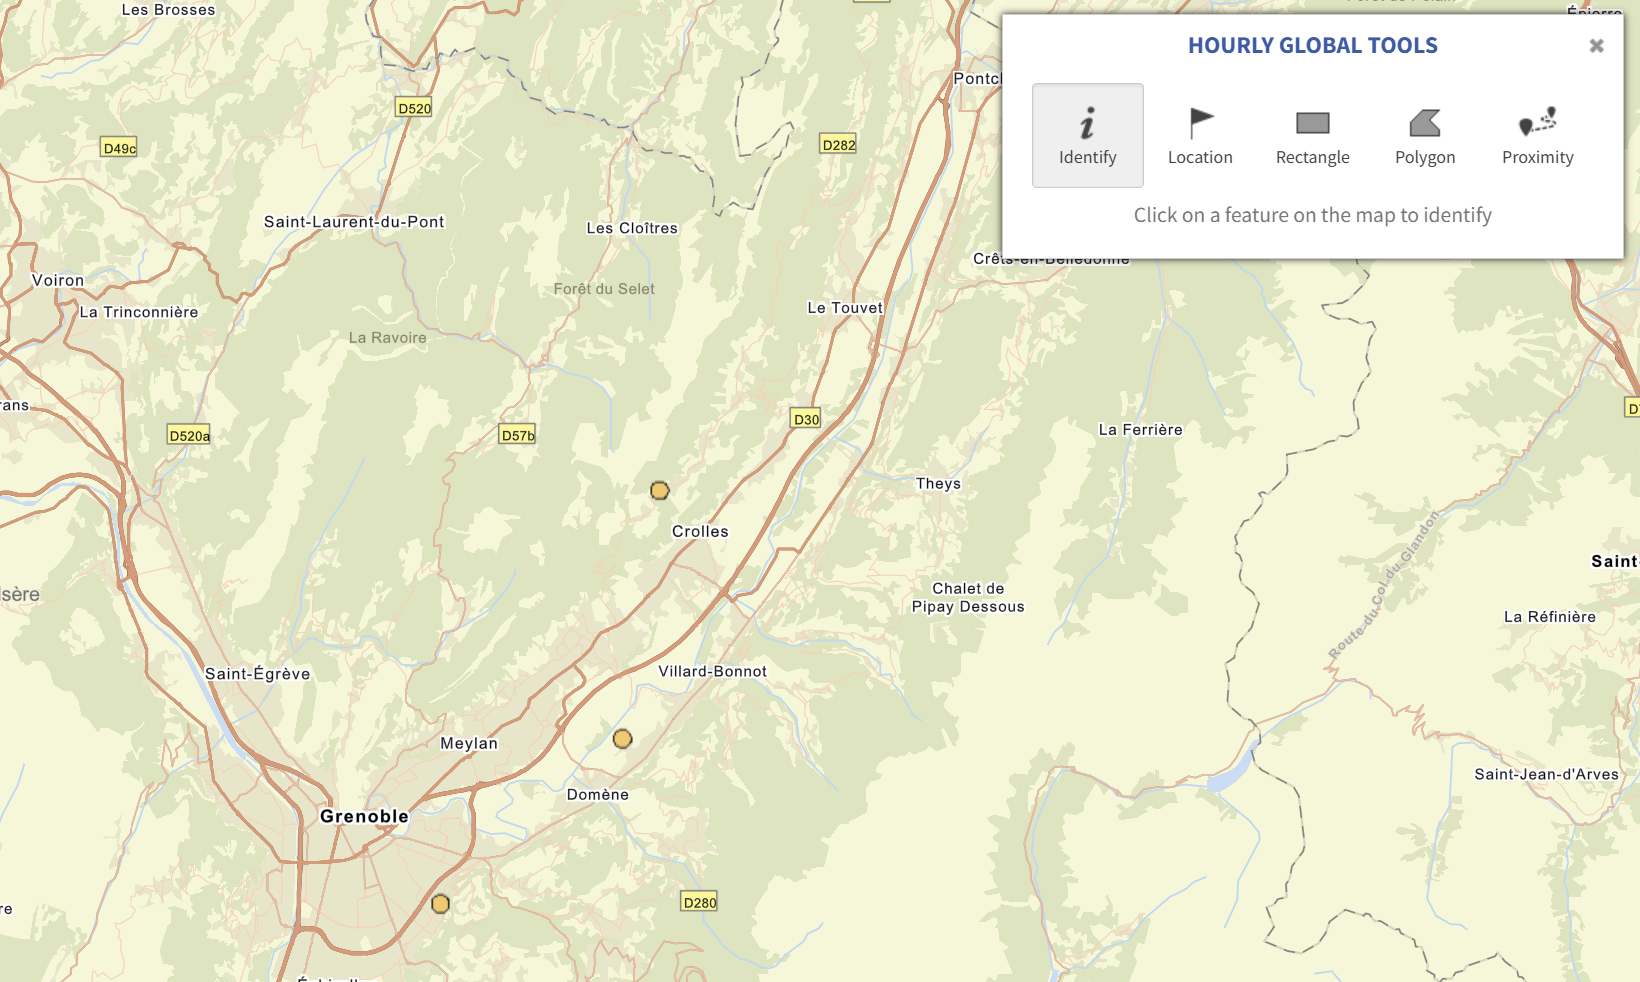

On click, the left panel will show the station's ID:

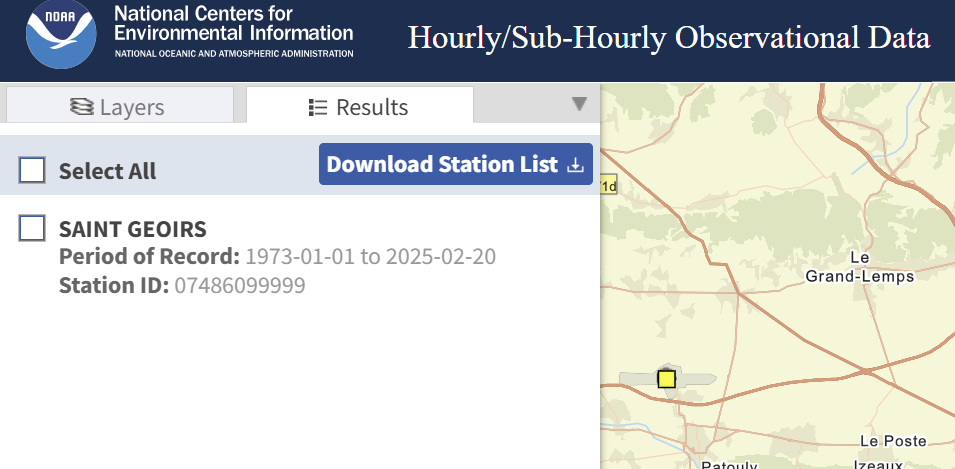

Once you have ID, you can proceed with the download form, or simply browse the data repository on https://www.ncei.noaa.gov/data/global-hourly/access/ by year & download the right ID. In this case, a direct link is https://www.ncei.noaa.gov/data/global-hourly/access/2024/07486099999.csv


In [ ]:
# Path to where you have copied the DATA/ folder (that contains the SDS, RESP etc folders)
DATA_PATH = "DATA"

In [ ]:
meteo = []
file = os.path.join(DATA_PATH, "METEO", "07486099999.csv")
meteo.append(pd.read_csv(file, index_col=1, parse_dates=True))

meteo = pd.concat(meteo)
print(meteo.TMP.head())
precip = meteo.AA1.dropna().to_frame()
precip.AA1 = precip.AA1.apply(lambda x: float(x.split(',')[1])/10.)
precip.loc[precip.AA1>599, "AA1"] *= np.nan
precip = precip.resample("1h").sum()

precip = precip.loc["2024-01-01":"2024-02-01"]



fig = plt.figure(figsize=(12,12))
plt.bar(precip.index, precip.AA1, width=1/24., alpha=0.5, ec="k")
plt.ylabel("Rainfall (mm/h)")
fig.autofmt_xdate()
plt.grid()
    


In [ ]:
def convert_fahrenheit_to_celsius(fahrenheit):
    celsius = float(fahrenheit - 32) * 5 / 9
    return celsius
    
temp = meteo.TMP
temp = temp.str.replace(",",".")
temp = temp.apply(float)
temp.loc[temp>599] *= np.nan
temp /= 10.0
# temp = temp.apply(convert_fahrenheit_to_celsius)
print(temp)

In [ ]:
temp.loc["2024-01-01":"2024-02-01"].plot(figsize=(10,6))
plt.ylabel("Temperature (°C)")
plt.axhline(0., c='r')
plt.grid()